## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
MOMENTUM = 0.95
BATCH_SIZE = 256
EPOCHS = 35

# nesterov = True

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的Graph清掉
    print("Experience with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" %str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experience with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

Epoch 7/35
50000/50000 [==============================] - 4s 84us/step - loss: 1.3848 - accuracy: 0.5068 - val_loss: 1.4549 - val_accuracy: 0.4836
Epoch 8/35
50000/50000 [==============================] - 4s 84us/step - loss: 1.3564 - accuracy: 0.5183 - val_loss: 1.4330 - val_accuracy: 0.4942
Epoch 9/35
50000/50000 [==============================] - 4s 85us/step - loss: 1.3349 - accuracy: 0.5243 - val_loss: 1.5513 - val_accuracy: 0.4687
Epoch 10/35
50000/50000 [==============================] - 4s 85us/step - loss: 1.3082 - accuracy: 0.5341 - val_loss: 1.4335 - val_accuracy: 0.4996
Epoch 11/35
50000/50000 [==============================] - 5s 90us/step - loss: 1.2931 - accuracy: 0.5416 - val_loss: 1.5233 - val_accuracy: 0.4732
Epoch 12/35
50000/50000 [==============================] - 4s 87us/step - loss: 1.2749 - accuracy: 0.5450 - val_loss: 1.4166 - val_accuracy: 0.5057
Epoch 13/35
50000/50000 [==============================] - 4s 85us/step - loss: 1.2512 - accuracy: 0.5563 - val_los

Epoch 20/35
50000/50000 [==============================] - 5s 99us/step - loss: 1.3841 - accuracy: 0.5094 - val_loss: 1.4547 - val_accuracy: 0.4862
Epoch 21/35
50000/50000 [==============================] - 5s 105us/step - loss: 1.3742 - accuracy: 0.5125 - val_loss: 1.4494 - val_accuracy: 0.4860
Epoch 22/35
50000/50000 [==============================] - 5s 94us/step - loss: 1.3624 - accuracy: 0.5149 - val_loss: 1.4372 - val_accuracy: 0.4949
Epoch 23/35
50000/50000 [==============================] - 8s 155us/step - loss: 1.3490 - accuracy: 0.5214 - val_loss: 1.4463 - val_accuracy: 0.4921
Epoch 24/35
50000/50000 [==============================] - 4s 86us/step - loss: 1.3404 - accuracy: 0.5259 - val_loss: 1.4415 - val_accuracy: 0.4879
Epoch 25/35
50000/50000 [==============================] - 4s 89us/step - loss: 1.3294 - accuracy: 0.5284 - val_loss: 1.4303 - val_accuracy: 0.4884
Epoch 26/35
50000/50000 [==============================] - 5s 97us/step - loss: 1.3199 - accuracy: 0.5309 - va

Epoch 33/35
50000/50000 [==============================] - 7s 136us/step - loss: 1.7443 - accuracy: 0.3902 - val_loss: 1.7432 - val_accuracy: 0.3855
Epoch 34/35
50000/50000 [==============================] - 5s 98us/step - loss: 1.7388 - accuracy: 0.3902 - val_loss: 1.7388 - val_accuracy: 0.3874
Epoch 35/35
50000/50000 [==============================] - 5s 99us/step - loss: 1.7336 - accuracy: 0.3921 - val_loss: 1.7330 - val_accuracy: 0.3942
Experience with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
______________________________________________

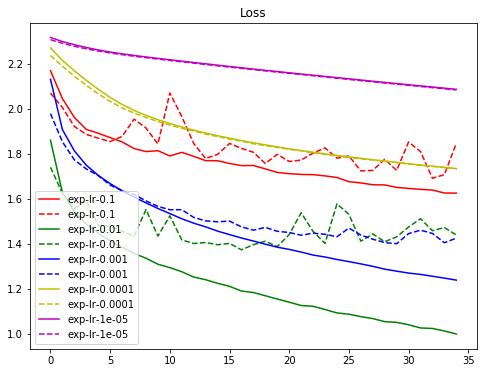

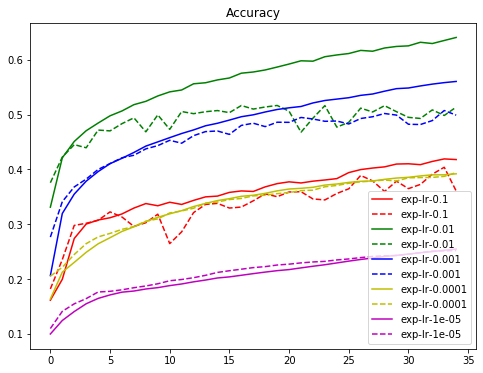

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# nesterov = False

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的Graph清掉
    print("Experience with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" %str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experience with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 4s 79us/step - loss: 1.5277 - accuracy: 0.4523 - val_loss: 1.5154 - val_accuracy: 0.4564
Epoch 7/35
50000/50000 [==============================] - 4s 77us/step - loss: 1.5032 - accuracy: 0.4629 - val_loss: 1.4946 - val_accuracy: 0.4648
Epoch 8/35
50000/50000 [==============================] - 4s 77us/step - loss: 1.4841 - accuracy: 0.4694 - val_loss: 1.4868 - val_accuracy: 0.4703
Epoch 9/35
50000/50000 [==============================] - 4s 78us/step - loss: 1.4490 - accuracy: 0.4809 - val_loss: 1.4995 - val_accuracy: 0.4655
Epoch 10/35
50000/50000 [==============================] - 4s 77us/step - loss: 1.4534 - accuracy: 0.4775 - val_loss: 1.4961 - val_accuracy: 0.4661
Epoch 11/35
50000/50000 [==============================] - 4s 77us/step - loss: 1.4287 - accuracy: 0.4866 - val_loss: 1.4919 - val_accuracy: 0.4675
Epoch 12/35
50000/50000 [==============================] - 4s 78us/step - loss: 1.4025 - accuracy: 0.4962 - val_loss: 1.4592 - 

50000/50000 [==============================] - 4s 87us/step - loss: 1.4095 - accuracy: 0.4987 - val_loss: 1.4585 - val_accuracy: 0.4745
Epoch 20/35
50000/50000 [==============================] - 4s 77us/step - loss: 1.3970 - accuracy: 0.5023 - val_loss: 1.4399 - val_accuracy: 0.4834
Epoch 21/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.3885 - accuracy: 0.5054 - val_loss: 1.4345 - val_accuracy: 0.4901
Epoch 22/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.3762 - accuracy: 0.5104 - val_loss: 1.4495 - val_accuracy: 0.4872
Epoch 23/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.3716 - accuracy: 0.5128 - val_loss: 1.4383 - val_accuracy: 0.4814
Epoch 24/35
50000/50000 [==============================] - 4s 75us/step - loss: 1.3605 - accuracy: 0.5158 - val_loss: 1.4230 - val_accuracy: 0.4891
Epoch 25/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.3441 - accuracy: 0.5202 - val_loss: 1.4333

50000/50000 [==============================] - 4s 76us/step - loss: 1.7355 - accuracy: 0.3888 - val_loss: 1.7310 - val_accuracy: 0.3915
Epoch 33/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.7296 - accuracy: 0.3911 - val_loss: 1.7266 - val_accuracy: 0.3974
Epoch 34/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.7252 - accuracy: 0.3920 - val_loss: 1.7208 - val_accuracy: 0.3961
Epoch 35/35
50000/50000 [==============================] - 4s 76us/step - loss: 1.7201 - accuracy: 0.3944 - val_loss: 1.7159 - val_accuracy: 0.3992
Experience with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
___________________________________________

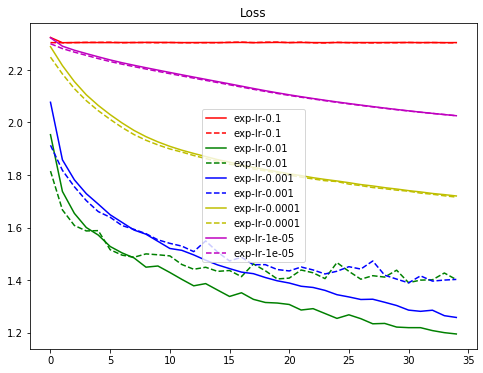

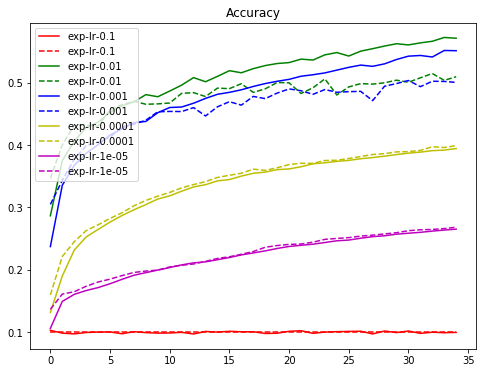

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()